In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Question 3

In [2]:
df = pd.DataFrame(np.random.randint(low=0, high=100, size=(50, 3)), columns=['A', 'B', 'C'])

In [3]:
df.head()

,A,B,C
0,8,90,97
1,78,93,38
2,40,73,28
3,40,32,9
4,35,55,58


In [4]:
missing_count = df.size // 10
missing_count

15

In [5]:
for i in range(missing_count+1):
    rand_x = np.random.randint(0, len(df)-1)
    rand_y = np.random.randint(0, 3)
    df.iloc[rand_x, rand_y] = np.nan

### Counting the missing values

In [17]:
df.isna().sum()

A    4
B    6
C    3
dtype: int64

### Dropping columns with more than 5 NaNs.

In [18]:
df.drop(df.columns[df.isna().sum() > 5], axis=1, inplace=True)

### Identify and drop the row label with highest sum

In [19]:
def row_sum(x):
    return np.sum(x)

row_sums = df.apply(row_sum, axis=1)

In [20]:
df.drop(np.argmax(row_sums), axis=0, inplace=True)

### Sort the dataframe by first column

In [21]:
df.sort_values(df.columns[0])

,A,C
0,1.0,27.0
2,1.0,47.0
5,1.0,81.0
40,4.0,76.0
31,5.0,78.0
14,5.0,93.0
28,6.0,43.0
48,9.0,77.0
41,13.0,3.0
7,14.0,14.0


### Remove all the duplicates from the first column

In [22]:
df['A'] = df['A'].drop_duplicates()

### Correlation between first and second column

In [26]:
print('Correlation:', df.iloc[:, 0].corr(df.iloc[:, 1]))
print('Covariance:', df.iloc[:, 0].cov(df.iloc[:, 1]))

Correlation: 0.15548107804240163
Covariance: 132.2414772727273


### Detect outliers and the rows with them

### Discretize the second column into 5 bins

In [24]:
discr = pd.cut(df.iloc[:, 1], 5)
pd.value_counts(discr)

(74.4, 93.0]      10
(-0.093, 18.6]     9
(18.6, 37.2]       8
(37.2, 55.8]       8
(55.8, 74.4]       8
Name: B, dtype: int64

## Question 5

In [35]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [36]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris[iris_data.target_names[0]] = iris_data.target

In [66]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Plot the barchart of the frequency of each class label

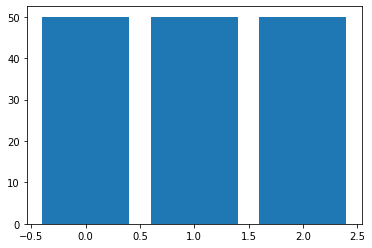

In [67]:
specie_freq = iris.setosa.value_counts()

plt.bar(x=specie_freq.index, height=specie_freq)
plt.show()

### Draw a scatter plot for Petal Width vs. Sepal Width

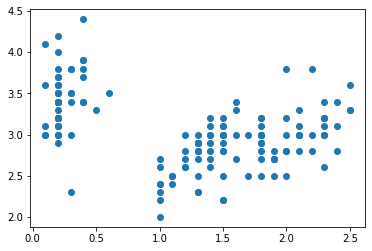

In [76]:
plt.scatter(iris['petal width (cm)'], iris['sepal width (cm)'])
plt.show()